In [1]:
import os
import csv
from email.parser import BytesParser, Parser
from email.policy import default
import numpy as np
import pandas as pd
import sys

In [2]:
def send_email_features_to_csv(emails, csvFileName):
    with open(csvFileName, 'w', newline='') as fp:
        writer = csv.writer(fp)
        
        # header row
        writer.writerow(["To","Body"])
        
        # define max & count
        
        for filename in os.listdir(emails):
            try:
                if (filename.endswith('.txt')):
                    # read each file as binary 
                    with open(os.path.join(emails, filename), 'rb') as fp:

                        # define message object
                        msg = BytesParser(policy=default).parse(fp)
                        to_ = msg.get('to')

                        # parse features
                        
                        body_ = msg.get_body(preferencelist=('plain')).get_content()
                       

                        # Write the row to the csv file
                        writer.writerow([to_,body_])
            except:
                pass

In [3]:
#Get all of the files from the spam and ham directory
hamPath = "data/ham_text/"
spamPath = "data/spam_text/"

In [4]:
send_email_features_to_csv(hamPath, "allHamData.csv")
send_email_features_to_csv(spamPath, "allSpamData.csv")

## HAM DATA SET UP

In [5]:
emailHamData = pd.read_csv('allHamData.csv')

In [6]:
emailHamData.shape # Check the size of the dataset

(1783, 2)

In [7]:
emailHamData.info() # Check to see if there are missing values (NaN or null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   To      1766 non-null   object
 1   Body    1783 non-null   object
dtypes: object(2)
memory usage: 28.0+ KB


In [8]:
emailHamData.head()

,To,Body
0,ilug@linux.ie,"On Tue, Aug 13, 2002 at 12:22:14PM +0100, Nial..."
1,fork@spamassassin.taint.org,Lucas Gonze:\n>Spam is *the* tool for dissiden...
2,zzzzteana@yahoogroups.com,\n\nhttp://www.thisislocallondon.co.uk/news/we...
3,zzzzteana@yahoogroups.com,Tom R:\n> http://www.cliktrik.com/people/famil...
4,fork@spamassassin.taint.org,JoeBar wrote:\n>C is more reliable than Java??...


In [9]:
#Remove any all duplicates in emails data
emailHamData = emailHamData.drop_duplicates(subset=['Body'])

In [10]:
emailHamData.shape # Check the size of the dataset

(1286, 2)

In [11]:
emailHamData["Label"] = 0

### Spam Data setup

In [12]:
emailSpamData = pd.read_csv('allSpamData.csv')

In [13]:
emailSpamData.shape # Check the size of the dataset

(89, 2)

In [14]:
emailSpamData.info() # Check to see if there are missing values (NaN or null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   To      88 non-null     object
 1   Body    89 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [15]:
emailSpamData.head()

,To,Body
0,bruce@untroubled.org,\n\n\n\n1 'Trick' Reverses Nerve Pain? -Try To...
1,bruce@untroubled.org,\n\n\nCongratulations - Details Apply\n\nhttp:...
2,bruce@untroubled.org,\n\n\nFLASH SALE! $9.99 for 11x14 Custom Canva...
3,bruce@untroubled.org,"\n\n\n\nHey,\n\nWhat if it only took 35-second..."
4,bruce@untroubled.org,\n\nSpecial Offer!\n\nCongratulations!\nhttp:/...


In [16]:
#Remove any all duplicates in emails data
emailSpamData = emailSpamData.drop_duplicates(subset=['Body'])

In [17]:
emailSpamData["Label"] = 1

In [18]:
emailSpamData.shape # Check the size of the dataset

(86, 3)

In [19]:
from sklearn.utils import shuffle
#hamEmails = shuffle(hamEmails).reset_index()
totalEmailsNeeded = len(emailSpamData)-1

emailHamData = shuffle(emailHamData)
emailHamData = emailHamData.reset_index()
emailHamData = emailHamData.drop(["index"], axis=1)
emailHamData = emailHamData.loc[0:totalEmailsNeeded, :]
emailHamData

emailSpamData = emailSpamData.reset_index()
emailSpamData = emailSpamData.drop(["index"], axis=1)
emailSpamData

,To,Body,Label
0,bruce@untroubled.org,\n\n\n\n1 'Trick' Reverses Nerve Pain? -Try To...,1
1,bruce@untroubled.org,\n\n\nCongratulations - Details Apply\n\nhttp:...,1
2,bruce@untroubled.org,\n\n\nFLASH SALE! $9.99 for 11x14 Custom Canva...,1
3,bruce@untroubled.org,"\n\n\n\nHey,\n\nWhat if it only took 35-second...",1
4,bruce@untroubled.org,\n\nSpecial Offer!\n\nCongratulations!\nhttp:/...,1
...,...,...,...
81,bruce@untroubled.org,"\n\nDear Patriot,\n\nI just got word that we h...",1
82,bruce@untroubled.org,\n\n\nYou wake up...\nhttp://www.translator-di...,1
83,bruce@untroubled.org,\nTime is running out to become a part of the...,1
84,bruce@untroubled.org,"\n\n\nThanks to this Harvard experiment, 5,683...",1


### Combine datasets

In [20]:
allEmails = [emailHamData, emailSpamData]

In [21]:
allEmails = pd.concat([emailHamData,emailSpamData], ignore_index=True)
allEmails.shape

(172, 3)

## Separate the features (x) from the labels (y)

In [22]:
# Separate the features (x) from the labels (y)
x = allEmails['Body']
y = allEmails["Label"]

In [23]:
# Apply a count vectorizer to the training data to convert from text to token counts
# Count vectorizer -- will it ensure the testing data has no impact on the training data's normalization?
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

from sklearn.feature_extraction import text

stList = text.ENGLISH_STOP_WORDS
stList = list(stList)

ourStopWords = ['www', 'com', 'php', 'https', 'xml','org','uk', 'net', 'like', 'html', 'http', 'index',
            'hml', 'htm', 'just', 'know', 'yahoo', 've', 'way', 'linux', 'said', 'day', 'time', 'ca', 'url', 
            'did', 'bruce']

stopWords = ourStopWords + stList
         

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents= "unicode", stop_words=stopWords, max_features=30) # This cuts the features to 40 words
features = cv.fit_transform(x)
features.get_shape()



(172, 30)

In [24]:
columns = cv.get_feature_names_out()

# Features is now in csr format (rather than a series or dataframe)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
type(features)
x = pd.DataFrame(features.toarray()) # convert it to an dataframe instead
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,0.656977,1.029070,2.627907,0.505814,1.627907,0.523256,1.313953,0.819767,0.470930,0.412791,...,3.063953,0.523256,0.511628,0.395349,0.372093,0.569767,1.872093,2.267442,0.523256,0.616279
std,3.441033,7.085466,34.388066,6.557436,21.349800,6.862436,17.232338,6.926267,1.369797,1.779828,...,39.647297,6.862436,1.136777,2.872654,0.817163,2.666845,24.552270,29.737221,6.862436,2.447907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
max,43.000000,92.000000,451.000000,86.000000,280.000000,90.000000,226.000000,90.000000,12.000000,21.000000,...,520.000000,90.000000,5.000000,33.000000,5.000000,33.000000,322.000000,390.000000,90.000000,29.000000


In [25]:
# Checking to make sure that there are no NaN's
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html
x.isna().sum().sum()

# Should print 0

0

In [26]:
x.columns = columns
#x = x.drop(["gt", "lt"], axis=1) # In the dataset we are using, &gt;  and &lt; are less than or greater than signs in html - not words
x.describe()

,10,2002,blog,blogs,blogspot,cahrnet_0bkttg,categories,click,email,free,...,radio,redirect,rest,software,use,users,weblog,weblogs,wh5,world
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,0.656977,1.029070,2.627907,0.505814,1.627907,0.523256,1.313953,0.819767,0.470930,0.412791,...,3.063953,0.523256,0.511628,0.395349,0.372093,0.569767,1.872093,2.267442,0.523256,0.616279
std,3.441033,7.085466,34.388066,6.557436,21.349800,6.862436,17.232338,6.926267,1.369797,1.779828,...,39.647297,6.862436,1.136777,2.872654,0.817163,2.666845,24.552270,29.737221,6.862436,2.447907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
max,43.000000,92.000000,451.000000,86.000000,280.000000,90.000000,226.000000,90.000000,12.000000,21.000000,...,520.000000,90.000000,5.000000,33.000000,5.000000,33.000000,322.000000,390.000000,90.000000,29.000000


In [27]:
columns

array(['10', '2002', 'blog', 'blogs', 'blogspot', 'cahrnet_0bkttg',
       'categories', 'click', 'email', 'free', 'god', 'information',
       'journal', 'life', 'list', 'lxoyup', 'mail', 'new', 'news',
       'people', 'radio', 'redirect', 'rest', 'software', 'use', 'users',
       'weblog', 'weblogs', 'wh5', 'world'], dtype=object)

In [28]:
x.max()

10                 43
2002               92
blog              451
blogs              86
blogspot          280
cahrnet_0bkttg     90
categories        226
click              90
email              12
free               21
god                29
information        13
journal            67
life               47
list                9
lxoyup             90
mail               17
new                14
news               84
people             14
radio             520
redirect           90
rest                5
software           33
use                 5
users              33
weblog            322
weblogs           390
wh5                90
world              29
dtype: int64

In [29]:
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
x = scaler.fit_transform(x)

In [30]:
#Mean Center data
x = x-np.mean(x,axis=0)

In [31]:
zVar = np.dot(x.T,x)
eigenvalues, eigenvectors = np.linalg.eig(zVar)

c:\Users\vanco\anaconda3\envs\tf\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


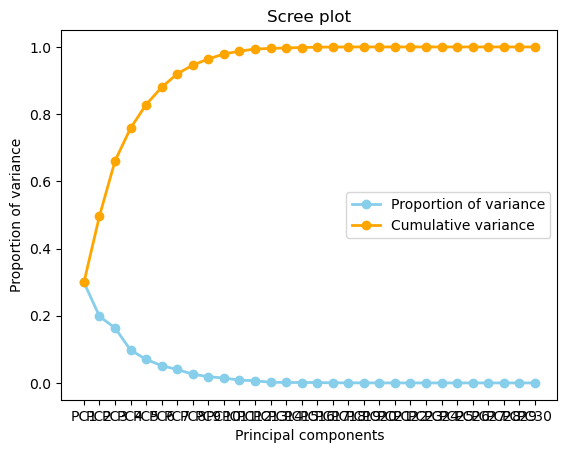

In [32]:
#1. Calculate the proportion of variance explained by each feature
sum_eigenvalues = np.sum(eigenvalues)

prop_var = [i/sum_eigenvalues for i in eigenvalues]

#2. Calculate the cumulative variance
cum_var = [np.sum(prop_var[:i+1]) for i in range(len(prop_var))]


# Plot scree plot from PCA
import matplotlib.pyplot as plt

x_labels = ['PC{}'.format(i+1) for i in range(len(prop_var))]

plt.plot(x_labels, prop_var, marker='o', markersize=6, color='skyblue', linewidth=2, label='Proportion of variance')
plt.plot(x_labels, cum_var, marker='o', color='orange', linewidth=2, label="Cumulative variance")
plt.legend()
plt.title('Scree plot')
plt.xlabel('Principal components')
plt.ylabel('Proportion of variance')
plt.show()

In [33]:
display(prop_var)

[(0.2991606306317052+0j),
 (0.19809097099840547+0j),
 (0.1635633960211926+0j),
 (0.09759159097397098+0j),
 (0.0701029125363609+0j),
 (0.05131922446337092+0j),
 (0.04002152226995415+0j),
 (0.02596153852437094+0j),
 (0.01850915450612207+0j),
 (0.01451165554697964+0j),
 (0.008557496939498883+0j),
 (0.00627482455141817+0j),
 (0.0020108455000379193+0j),
 (0.0012752005994431318+0j),
 (0.0012538434337706762+0j),
 (0.001095806643465615+0j),
 (0.00035492616008183324+0j),
 (0.00018341827133890707+0j),
 (0.00011286439027817188+0j),
 (4.0328563332837955e-05+0j),
 (5.352866789701694e-06+0j),
 (2.0749854904631743e-06+0j),
 (4.206226209198632e-07+0j),
 (-8.680044810938397e-17+0j),
 (-9.464216786250603e-17+0j),
 (2.5357143809710426e-17+0j),
 (8.92015533948917e-18+0j),
 (2.7167554098137515e-19+0j),
 (-2.1761378477210136e-18+7.960870396841787e-19j),
 (-2.1761378477210136e-18-7.960870396841787e-19j)]

In [34]:
u, s, vh = np.linalg.svd(x, full_matrices=True)
x = pd.DataFrame(x)
x.columns = columns
x

,10,2002,blog,blogs,blogspot,cahrnet_0bkttg,categories,click,email,free,...,radio,redirect,rest,software,use,users,weblog,weblogs,wh5,world
0,-0.015279,-0.011186,-0.005827,-0.005882,-0.005814,-0.005814,-0.005814,-0.009109,-0.039244,0.075581,...,-0.003969,-0.005814,-0.102326,0.018323,-0.074419,-0.017266,-0.005814,-0.005814,-0.005814,0.047715
1,0.007977,-0.000316,-0.005827,-0.005882,-0.005814,-0.005814,-0.005814,-0.009109,-0.039244,-0.019657,...,-0.005892,-0.005814,-0.102326,-0.011980,-0.074419,0.013037,-0.005814,-0.005814,-0.005814,-0.021251
2,-0.015279,0.010554,-0.005827,-0.005882,-0.005814,-0.005814,-0.005814,-0.009109,-0.039244,-0.019657,...,-0.005892,-0.005814,-0.102326,-0.011980,-0.074419,0.013037,-0.005814,-0.005814,-0.005814,-0.021251
3,0.007977,0.130119,-0.005827,-0.005882,-0.005814,-0.005814,-0.005814,-0.009109,0.627422,0.980343,...,-0.005892,-0.005814,-0.102326,0.988020,0.725581,0.103946,-0.005814,-0.005814,-0.005814,0.323577
4,-0.015279,0.021423,-0.005827,-0.005882,-0.005814,-0.005814,-0.005814,-0.009109,0.044089,-0.019657,...,-0.005892,-0.005814,-0.102326,0.533474,0.125581,0.013037,-0.005814,-0.005814,-0.005814,0.013232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,-0.015279,-0.011186,-0.005827,-0.005882,-0.005814,-0.005814,-0.005814,0.013114,0.044089,-0.019657,...,-0.005892,-0.005814,0.497674,-0.011980,-0.074419,-0.017266,-0.005814,-0.005814,-0.005814,-0.021251
168,-0.015279,-0.011186,-0.005827,-0.005882,-0.005814,-0.005814,-0.005814,-0.009109,-0.039244,-0.019657,...,-0.005892,-0.005814,0.497674,-0.011980,-0.074419,-0.017266,-0.005814,-0.005814,-0.005814,-0.021251
169,-0.015279,-0.011186,-0.005827,-0.005882,-0.005814,-0.005814,-0.005814,0.002003,-0.039244,-0.019657,...,-0.005892,-0.005814,0.697674,-0.011980,-0.074419,-0.017266,-0.005814,-0.005814,-0.005814,-0.021251
170,-0.015279,-0.011186,-0.005827,-0.005882,-0.005814,-0.005814,-0.005814,0.002003,-0.039244,-0.019657,...,-0.005892,-0.005814,0.497674,-0.011980,-0.074419,-0.017266,-0.005814,-0.005814,-0.005814,-0.021251


In [35]:
nfeatures = len(x.columns);
nfeatures

30

In [36]:
Vsquare = [[0 for x in range(0,nfeatures)] for y in range(0,nfeatures)] 

for i in range(0,nfeatures):
    for j in range(0,nfeatures):
        Vsquare[i][j] = vh[i][j]**2
        if vh[i][j]<0:

            Vsquare[i][j] = Vsquare[i][j]*-1; 
        else:
            Vsquare[i][j] = Vsquare[i][j]*1; 

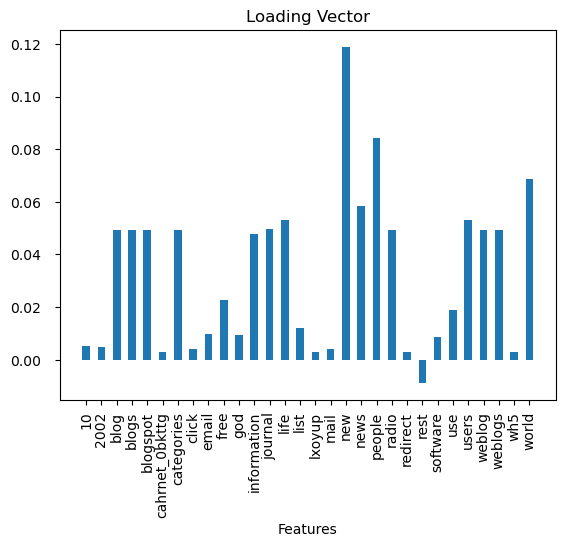

In [37]:
from matplotlib.pyplot import bar, grid, title, xlabel, ylabel

# bar(columns, Vsquare[:][38], 0.5); # CHANGED FROM 1.5 TO 1.0
# grid; 
# xlabel('Feature index')
# ylabel('Importance of feature')
# title("Loading Vector")

y_pos = np.arange(len(columns))
fig, ax = plt.subplots()

ax.bar(columns, Vsquare[:][0], 0.5, linewidth = 1000)
ax.set_xticks(columns)
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.set_xticklabels(columns, rotation=90)
ax.set_xlabel('Features')
ax.set_title('Loading Vector')

plt.show() 

## Split the Data

In [38]:
# Split into training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train.shape

(137, 30)

## Neural Network

In [39]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

train_shape = x_train.shape
b = train_shape[1]
input_shape = (b,)

print(input_shape)

(30,)


#### Sequential Model

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
# https://keras.io/api/models/sequential/

# Activation function options:
# - relu - commonly used for Sequential models
# - sigmoid - good for last layer of binary classification
# - elu - 

model = Sequential()
model.add(Dense(8, input_shape = input_shape, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid')) # Always use a sigmoid function for final layer when performing binary classification.

#### Callbacks

In [41]:
callback1 = keras.callbacks.EarlyStopping(monitor='loss', verbose = 1, min_delta = 0.001,
                                          mode="min", patience=5, restore_best_weights=True) # Works well for loss

callback2 = keras.callbacks.EarlyStopping(
    monitor='precision', verbose = 1, baseline = 0.90,
    min_delta = 0.001, mode="auto", patience=3, restore_best_weights=True) # Works well

In [42]:
model.summary() #This tells us what was in this network
epochs = 500 #Set up the epoch number

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 248       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [43]:
# https://keras.io/api/metrics/classification_metrics/#precision-class
# Optimizer options:
# - sgd (stochastic gradient descent)
# - adam
# - rmsprop
# - adagrad
# - adadelta

# https://keras.io/api/losses/
# https://www.tensorflow.org/api_docs/python/tf/keras/losses 
# Loss parameter options: 
# - binary_crossentropy https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class
# - mse 
# - mae
# - hinge
# - huber

# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# https://www.tensorflow.org/api_docs/python/tf/keras/metrics
# metrics can be a list, like this: metrics=["mae", "acc"]
# Metrics parameter options:
# - precision https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision
# - accuracy
# - recall

# https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision
# https://keras.io/api/metrics/classification_metrics/#precision-class

### Hyperparameter Search - Optimize for Precision

In [44]:
# This function will perform a hyperparameter search and print the results to a file
# This takes a while to close the file and flush the buffer!

def hyperparameterSearchWithDoc():
    file = open('output.txt', 'a')
    sys.stdout = file

    optArray = ['sgd', 'adam', 'rmsprop', 'adagrad', 'adadelta']
    lossArray = ['binary_crossentropy', 'mse', 'mae','hinge', 'huber']

    for j in range(0, len(optArray)):
        for k in range(0, len(lossArray)):
            model.compile(optimizer=optArray[j],
                loss=lossArray[k],
                metrics=[keras.metrics.Precision(),
                            keras.metrics.FalseNegatives(),
                            keras.metrics.TrueNegatives(),
                            keras.metrics.FalsePositives(),
                            keras.metrics.TruePositives()
                        ]
                )
       
            print(optArray[j], lossArray[k])
            model.fit(x = x_train, y = y_train, epochs=epochs, callbacks=[callback1, callback2])

            score = model.evaluate(x_test, y_test, verbose=0)
            print("Test loss:", score[0])
            print("Test precision:", score[1])
            print("Test False Negatives:", score[2])
            print("Test True Negatives:", score[3])
            print("Test False Positives:", score[4])
            print("Test True Positives:", score[5])

            file.flush()
            os.fsync(file.fileno())
            file.close()

In [45]:
# This version of the function does not write to a file, 
# but it does output the best combination of optimizers and loss functions.
import os

def hyperparameterSearch():
    
    bestPrecision = 0
    bestOpt = ''
    bestLoss = ''
    bestScore = []

    optArray = ['sgd', 'adam', 'rmsprop', 'adagrad', 'adadelta']
    lossArray = ['binary_crossentropy', 'mse', 'mae','hinge', 'huber']

    for j in range(0, len(optArray)):
        for k in range(0, len(lossArray)):
            model.compile(optimizer=optArray[j],
                loss=lossArray[k],
                metrics=[keras.metrics.Precision(),
                            keras.metrics.FalseNegatives(),
                            keras.metrics.TrueNegatives(),
                            keras.metrics.FalsePositives(),
                            keras.metrics.TruePositives()
                        ]
                )
       
            print(optArray[j], lossArray[k])
            model.fit(x = x_train, y = y_train, epochs=epochs, callbacks=[callback1, callback2])
            
            score = model.evaluate(x_test, y_test, verbose=0)
            y_pred = (model.predict(x_test) > 0.5).astype("int32")

            if score[1] > bestPrecision:
                bestOpt = optArray[j]
                bestLoss = lossArray[k]
                bestPrecision = score[1]
                bestScore = score
                y_pred = (model.predict(x_test) > 0.5).astype("int32")
                titleNum = "{:.5f}".format(bestPrecision)
                
                model_json = model.to_json() # Convert the model to a json format
                with open("model" + str(bestLoss) + str(bestOpt)+ titleNum + ".json", "w") as json_file: 
                    json_file.write(model_json) # Save the model
                model.save_weights("model" + str(bestLoss) + str(bestOpt) + titleNum + ".h5") # Save the weights
                print("Saved model to disk")
    
    return bestOpt, bestLoss, bestPrecision, bestScore, y_pred

In [46]:
bestOpt, bestLoss, bestPrecision, bestScore, bestPred = hyperparameterSearch()

sgd binary_crossentropy
Epoch 1/500
5/5 [==============================] - 1s 5ms/step - loss: 0.6917 - precision: 0.4706 - false_negatives: 0.0000e+00 - true_negatives: 1.0000 - false_positives: 72.0000 - true_positives: 64.0000
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6910 - precision: 0.4882 - false_negatives: 2.0000 - true_negatives: 8.0000 - false_positives: 65.0000 - true_positives: 62.0000
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6903 - precision: 0.4882 - false_negatives: 2.0000 - true_negatives: 8.0000 - false_positives: 65.0000 - true_positives: 62.0000    
Epoch 4/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6895 - precision: 0.4769 - false_negatives: 2.0000 - true_negatives: 5.0000 - false_positives: 68.0000 - true_positives: 62.0000
Epoch 4: early stopping
2/2 [==============================] - 0s 4ms/step
Saved model to disk
sgd mse
Epoch 1/500
5/5 [==============================] - 1s 3ms

In [47]:
display(bestOpt, bestLoss, bestPrecision)

'adam'

'binary_crossentropy'

0.949999988079071

In [56]:
print("Test loss:", bestScore[0])
print("Test precision:", bestScore[1])
print("Test False Negatives:", bestScore[2])
print("Test True Negatives:", bestScore[3])
print("Test False Positives:", bestScore[4])
print("Test True Positives:", bestScore[5])

Test loss: 0.30301836133003235
Test precision: 0.949999988079071
Test False Negatives: 3.0
Test True Negatives: 12.0
Test False Positives: 1.0
Test True Positives: 19.0


## Confusion Matrix Function

In [49]:
# https://towardsdatascience.com/spam-detection-in-emails-de0398ea3b48

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def confusionMatrixGraphing(prediction, title):
    cf_matrix = confusion_matrix(y_test, prediction)

    ax= plt.subplot()
    #annot=True to annotate cells
    sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='')
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)
    ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

## Decision Tree

In [50]:
from sklearn import tree


clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [51]:
y_predictionTree = clf.predict(x_test)

In [52]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics


print("Accuracy:", metrics.accuracy_score(y_test, y_predictionTree))
print("Precision:", metrics.precision_score(y_test, y_predictionTree))

Accuracy: 0.8285714285714286
Precision: 0.8636363636363636


[Text(0.8276515151515151, 0.9666666666666667, 'x[14] <= -0.011\ngini = 0.498\nsamples = 137\nvalue = [73, 64]'),
 Text(0.7462121212121212, 0.9, 'x[1] <= -0.006\ngini = 0.402\nsamples = 86\nvalue = [24, 62]'),
 Text(0.7159090909090909, 0.8333333333333334, 'x[20] <= -0.003\ngini = 0.256\nsamples = 73\nvalue = [11, 62]'),
 Text(0.6856060606060606, 0.7666666666666667, 'x[16] <= 0.002\ngini = 0.239\nsamples = 72\nvalue = [10, 62]'),
 Text(0.553030303030303, 0.7, 'x[8] <= 0.002\ngini = 0.192\nsamples = 65\nvalue = [7, 58]'),
 Text(0.4393939393939394, 0.6333333333333333, 'x[29] <= 0.03\ngini = 0.135\nsamples = 55\nvalue = [4, 51]'),
 Text(0.30303030303030304, 0.5666666666666667, 'x[29] <= -0.004\ngini = 0.078\nsamples = 49\nvalue = [2, 47]'),
 Text(0.24242424242424243, 0.5, 'x[22] <= -0.002\ngini = 0.046\nsamples = 42\nvalue = [1, 41]'),
 Text(0.21212121212121213, 0.43333333333333335, 'x[7] <= -0.004\ngini = 0.071\nsamples = 27\nvalue = [1, 26]'),
 Text(0.18181818181818182, 0.3666666666666666

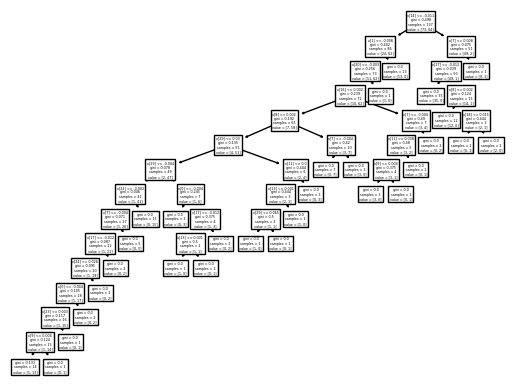

In [53]:
tree.plot_tree(clf)

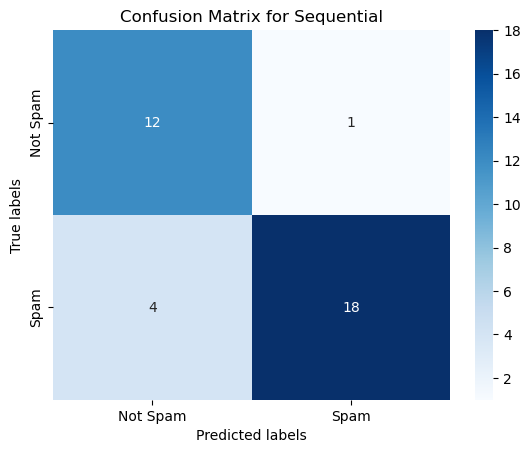

In [54]:
confusionMatrixGraphing(bestPred, 'Confusion Matrix for Sequential')

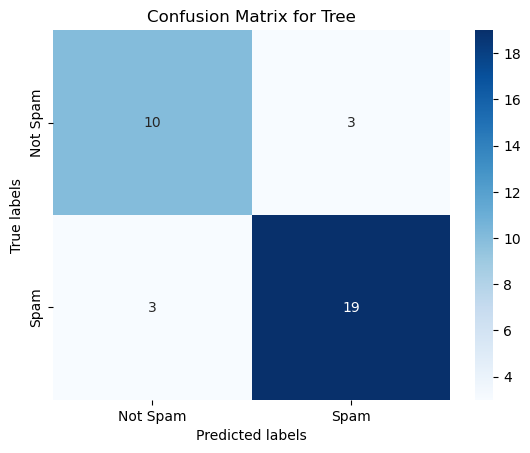

In [55]:
confusionMatrixGraphing(y_predictionTree, 'Confusion Matrix for Tree')